In [1]:
from larch.io import read_ascii
from larch.xafs import autobk

import numpy as np
import matplotlib.pyplot as plt

[root] WARNING : Larchs apps and shell are not supported due to missing dependencies: cannot import name 'LarchWxApp' from 'larch.wxlib' (D:\Python\Anaconda3\envs\xraylarch\lib\site-packages\larch\wxlib\__init__.py)


In [2]:
# Demostration 1: Ni reference standard in SPring-8 file format (1)
"""
read_ascii():
The function to read data from a plain text file, like .dat files generated from SPring-8.
The "labels" argument is used to split columns into respective data.

Datasets in Larch is organised in "Group", which stores all related (meta)data as attribute.
Larch functions will particularly look for attributes named "energy" and "mu" for operations.

Below shows a simple example to read a .dat file from SPring-8 and compute "mu" for this dataset.
See the output of this code cell when ni_std is inspected - a typical structure of a "Group"

"""
ni_path = "data\\demo\\SPring-8_Ni_foil.dat"

ni_std = read_ascii(ni_path, labels="energy time i0 i1")
ni_std.mu = - np.log10( ni_std.i1 / ni_std.i0 )

ni_std

Attribute,Type
path,str
filename,str
header,list
data,ndarray
array_labels,list
attrs,Group
energy,ndarray
time,ndarray
i0,ndarray
i1,ndarray


In [3]:
# Demostration 1: Ni reference standard in SPring-8 file format (2)
"""
autobk():
The function to automatically compute parameters for normalisation and transformation to k-space.

See the output of this code cell when ni_std is inspected after autobk is run.
All normalisation and k-space (meta)data is stored in this "Group".

"""
autobk(ni_std)
ni_std

Attribute,Type
path,str
filename,str
header,list
data,ndarray
array_labels,list
attrs,Group
energy,ndarray
time,ndarray
i0,ndarray
i1,ndarray


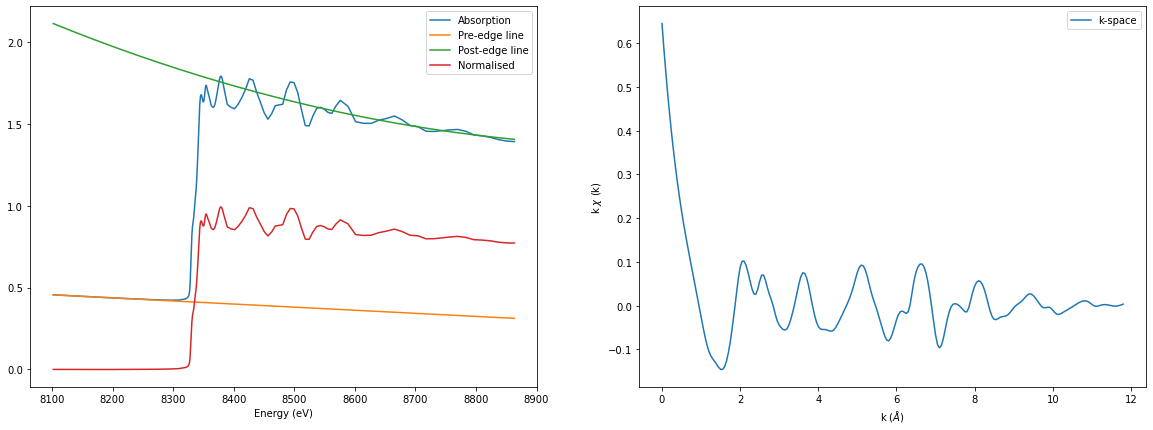

In [4]:
# Demostration 1: Ni reference standard in SPring-8 file format (3)
"""
To extract the data from the data group is same as getting an attribute from an Python object.
See below as demonstration.

Note: Here I am using matplotlib for visualisation because I am more familiar. Larch, by default, uses wxmplot.

"""
x = ni_std.energy

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(x, ni_std.mu, label="Absorption")
ax[0].plot(x, ni_std.pre_edge, label="Pre-edge line")
ax[0].plot(x, ni_std.post_edge, label="Post-edge line")
ax[0].plot(x, ni_std.norm, label="Normalised")
ax[0].set_xlabel("Energy (eV)")
ax[0].legend()

ax[1].plot(ni_std.k, ni_std.chi, label="k-space")
ax[1].set_ylabel("k $\chi$ (k)")
ax[1].set_xlabel("k ($\AA$)")
ax[1].legend()